In [178]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
#leakage_dataset_train_100 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_100.csv")
leakage_dataset_train_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_train_1000.csv")
leakage_dataset_validation_1000 = pd.read_csv(r"Leakage Detection\leakage_dataset_validation_1000.csv")

In [180]:
X_train = leakage_dataset_train_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_train = leakage_dataset_train_1000[['y1', 'y2']].to_numpy()

In [181]:
X_validation = leakage_dataset_validation_1000[['mfc1', 'mfc2', 'mfc3', 'mfc4']].to_numpy()
Y_validation = leakage_dataset_validation_1000[['y1', 'y2']].to_numpy()

In [182]:
leakage_dataset_train_100.isnull().sum()

y1      0
y2      0
mfc1    0
mfc2    0
mfc3    0
mfc4    0
dtype: int64

Text(0.5, 0, 'Data')

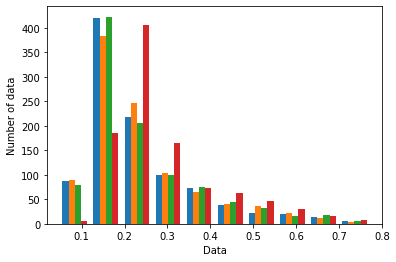

In [183]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

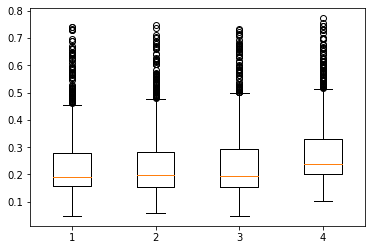

In [184]:
%matplotlib inline
B = plt.boxplot(X_train)
plt.show()

In [185]:
list_whisker = [item.get_ydata() for item in B['whiskers']]
list_whisker

[array([0.15586604, 0.04945534]),
 array([0.27686248, 0.45413314]),
 array([0.15503371, 0.06045403]),
 array([0.28369336, 0.47453284]),
 array([0.15537894, 0.04798132]),
 array([0.29311002, 0.49867403]),
 array([0.20332851, 0.10427373]),
 array([0.32852423, 0.51399843])]

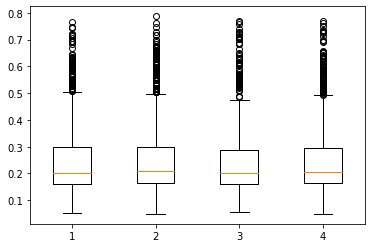

In [186]:
%matplotlib inline
B1 = plt.boxplot(X_validation)
plt.show()

In [187]:
list_whisker_val = [item.get_ydata() for item in B1['whiskers']]
list_whisker_val

[array([0.16234618, 0.05349716]),
 array([0.2993559 , 0.50403049]),
 array([0.16344416, 0.04891348]),
 array([0.29840857, 0.49760057]),
 array([0.16077478, 0.05659426]),
 array([0.28779415, 0.47630593]),
 array([0.16270096, 0.04941728]),
 array([0.29547214, 0.49441948])]

In [188]:
diff1 = list_whisker[-2][1] - list_whisker_val[-2][1]
diff2 = list_whisker[-1][1] - list_whisker_val[-1][1]
diff = (diff1+diff2)/2
diff

0.03721770183359886

In [189]:
X_train[:,-1] = X_train[:,-1] - diff
X_train[:,:-1] = X_train[:,:-1] + diff/3

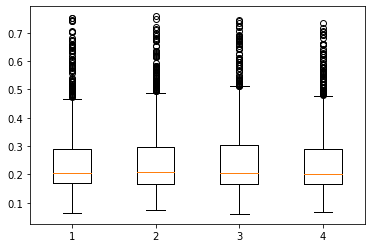

[array([0.16827194, 0.06186124]),
 array([0.28926838, 0.46653904]),
 array([0.16743962, 0.07285993]),
 array([0.29609926, 0.48693874]),
 array([0.16778484, 0.06038722]),
 array([0.30551592, 0.51107993]),
 array([0.1661108 , 0.06705603]),
 array([0.29130653, 0.47678073])]

In [190]:
%matplotlib inline
B2 = plt.boxplot(X_train)
plt.show()
list_whisker_new = [item.get_ydata() for item in B2['whiskers']]
list_whisker_new

In [191]:
# count = 0
# lower_whisker = 0
# upper_whisker = 0
# for i in list_whisker[:-2]:
#     if count%2 == 0:
#         lower_whisker = lower_whisker + i[1]
#     if count%2 != 0:
#         upper_whisker += i[1]
#     count += 1
    
# lower_whisker = lower_whisker/3
# upper_whisker = upper_whisker/3

# print(lower_whisker)
# print(upper_whisker)

In [192]:
# diff_lower_whisker = list_whisker[-2][1] - lower_whisker
# diff_lower_whisker = float("{:10.9f}".format(diff_lower_whisker))
# diff_upper_whisker = list_whisker[-1][1] - upper_whisker
# diff_upper_whisker = float("{:10.9f}".format(diff_upper_whisker))
# print(diff_lower_whisker)
# print(diff_upper_whisker)

In [193]:
# X_train[:,-1] = X_train[:,-1] - diff_lower_whisker
# X_train

In [194]:
# lst = []
# for i in X_train:
#     sum = 0
#     for j in i:
#         sum += j
#     lst.append(sum)
# lst

In [195]:
# %matplotlib inline
# B = plt.boxplot(X_train)
# plt.show()

Text(0.5, 0, 'Data')

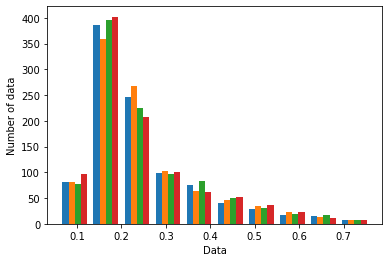

In [196]:
plt.hist(X_train)
plt.ylabel('Number of data')
plt.xlabel('Data')

In [197]:
# lst = []
# for i in X_train[:,:-1]:
#     sum = 0
#     for j in i:
#         sum += j
#     lst.append(sum)
# X_train[:,-1] = np.ones(100) - lst

In [199]:
# l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
# l1 = tf.keras.layers.Dense(units = 64)
# l2 = tf.keras.layers.Dense(units = 128)
# l3 = tf.keras.layers.Dense(units = 2)
# model = tf.keras.Sequential([l0,l1,l2,l3])

In [163]:
# X_train.shape

In [200]:
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 8,918
Trainable params: 8,918
Non-trainable params: 0
_________________________________________________________________


In [201]:
# model.compile(
#     loss='mean_squared_error',
#     optimizer=keras.optimizers.Adam(),
#     metrics=["accuracy"],
# )

In [206]:
# history = model.fit(X_train, Y_train, epochs=100, verbose=False, validation_data=(X_validation, Y_validation))

In [207]:
# print(history.history['accuracy'][-1])

0.9350000023841858


In [208]:
# print(model.predict(np.array([0.365104949,0.187123712,0.174337773,0.273433566]).reshape(1,4)))

1/1 [==============================] - 0s 15ms/step
[[-0.47618982  0.17218228]]


In [209]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(tf.keras.layers.InputLayer(input_shape=(4,)))
    model.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=8, max_value=128, step=16),
            activation="relu",
        )
    )
    model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(2, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.MeanSquaredError(), metrics=["accuracy"],
    )
    return model

In [210]:
build_model(keras_tuner.HyperParameters())

In [211]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
)

In [212]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 16, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [213]:
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_validation, Y_validation))

Trial 3 Complete [00h 00m 16s]
val_accuracy: 0.9535000026226044

Best val_accuracy So Far: 0.9535000026226044
Total elapsed time: 00h 00m 49s
INFO:tensorflow:Oracle triggered exit


In [214]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.build(input_shape=(None, 4))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 72)                360       
                                                                 
 dropout (Dropout)           (None, 72)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 146       
                                                                 
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________


In [215]:
#best_model.build(input_shape=[])
tuner.results_summary()

Results summary
Results in my_dir\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 72
lr: 0.0013653402122746191
Score: 0.9535000026226044
Trial summary
Hyperparameters:
units: 8
lr: 0.0016514956852749707
Score: 0.953000009059906
Trial summary
Hyperparameters:
units: 120
lr: 0.0002115705594649727
Score: 0.953000009059906


In [216]:
# best_hps = tuner.get_best_hyperparameters(5)
# best_model = build_model(best_hps[0])
# x_all = np.concatenate((X_train, X_validation))
# y_all = np.concatenate((Y_train, Y_validation))
# best_model.fit(x=x_all, y=y_all, epochs=1)
#best_model.summary()

In [217]:
print(best_model.predict(np.array([0.156413272,0.138724925,0.189124339,0.515737464]).reshape(1,4)))

1/1 [==============================] - 0s 38ms/step
[[0.5918924  0.40810755]]
